## Języki skryptowe w analizie danych
### Projekt 1, język Python

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'sustainable_fashion_trends_2024.csv')

## Analiza bazy danych

In [101]:
df.head()

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,BRAND-0001,Brand_1,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS
1,BRAND-0002,Brand_2,Japan,2015,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,15,250.07,Growing,GOTS
2,BRAND-0003,Brand_3,USA,2024,A,Vegan Leather,No,336.66,467454.52,38385.92,No,2,146.16,Growing,B Corp
3,BRAND-0004,Brand_4,Italy,2023,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,13,165.52,Stable,OEKO-TEX
4,BRAND-0005,Brand_5,USA,2016,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,19,211.63,Stable,Fair Trade


In [103]:
df = df.sort_values(by='Year', ascending=True)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2162 to 4181
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand_ID                    5000 non-null   object 
 1   Brand_Name                  5000 non-null   object 
 2   Country                     5000 non-null   object 
 3   Year                        5000 non-null   int64  
 4   Sustainability_Rating       5000 non-null   object 
 5   Material_Type               5000 non-null   object 
 6   Eco_Friendly_Manufacturing  5000 non-null   object 
 7   Carbon_Footprint_MT         5000 non-null   float64
 8   Water_Usage_Liters          5000 non-null   float64
 9   Waste_Production_KG         5000 non-null   float64
 10  Recycling_Programs          5000 non-null   object 
 11  Product_Lines               5000 non-null   int64  
 12  Average_Price_USD           5000 non-null   float64
 13  Market_Trend                5000 no

In [10]:
df.isna().sum()

Brand_ID                      0
Brand_Name                    0
Country                       0
Year                          0
Sustainability_Rating         0
Material_Type                 0
Eco_Friendly_Manufacturing    0
Carbon_Footprint_MT           0
Water_Usage_Liters            0
Waste_Production_KG           0
Recycling_Programs            0
Product_Lines                 0
Average_Price_USD             0
Market_Trend                  0
Certifications                0
dtype: int64

In [9]:
df = df.dropna()

In [109]:
duplicated_rows = df.duplicated()
duplicated_rows[duplicated_rows == True].sum()

0

In [111]:
numeric_cols = ['Year', 'Carbon_Footprint_MT', 'Water_Usage_Liters', 'Waste_Production_KG', 'Product_Lines', 'Average_Price_USD']
df[numeric_cols].describe()

,Year,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Product_Lines,Average_Price_USD
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2016.956200,250.317550,2.517862e+06,50107.304048,10.431200,259.354216
std,4.347466,142.802345,1.429043e+06,28746.381115,5.706573,137.730976
min,2010.000000,1.040000,5.010618e+04,1026.380000,1.000000,20.020000
25%,2013.000000,126.615000,1.293087e+06,25340.802500,5.000000,142.865000
50%,2017.000000,250.650000,2.499096e+06,50466.340000,10.000000,258.615000
75%,2021.000000,372.255000,3.763860e+06,74984.650000,15.000000,378.595000
max,2024.000000,499.930000,4.999597e+06,99947.850000,20.000000,499.940000


## Wizualizacja głównych wartości

In [114]:
PALETTE = "crest"

In [116]:
sns.set_palette(PALETTE)

In [118]:
countries = df['Country'].value_counts()

In [11]:
colors = sns.color_palette(PALETTE, 10)
plt.figure(figsize=(8, 8))
plt.pie(countries, labels=countries.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Procent danych zebranych dla każdego kraju')
plt.show()

NameError: name 'PALETTE' is not defined

Najmniej danych zostało zebranych w Japonii, natomiast najwięcej w Wielkiej Brytanii. Różnice są jednak nieznaczne, ponieważ różnica między procentem największej ilości danych, a najmniejszej wynosi jedynie 1 punkt procentowy.

In [12]:
plt.figure(figsize=(10, 6))

df['Year'].value_counts().sort_index().plot(kind='bar', color=sns.color_palette(PALETTE, n_colors=15))

mean_value = df['Year'].value_counts().mean()
plt.axhline(mean_value, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_value:.2f}')

plt.title('Ilość danych zebrana na przestrzeni lat')
plt.xlabel('Rok')
plt.ylabel('Ilość danych')
plt.ylim(270,370)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

NameError: name 'PALETTE' is not defined

<Figure size 1000x600 with 0 Axes>

W latach 2010, 2011, 2012, 2016, 2017, 2018, 2021, 2022, 2024 zebrano ilość danych większą niż średnia, przy czym największą ilość danych zebrano w 2018 roku. Natomiast w latach 2013, 2014, 2015, 2019, 2020, 2023 zebrano ilość danych mniejszą niż średnia, a najmniejszą ilość danych zebrano w 2020 roku. Wartości najbliższe średniej przypadają na lata 2023 i 2024.

In [13]:
plt.figure(figsize=(10, 6))
df['Sustainability_Rating'].value_counts().sort_index().plot(kind='bar', color=sns.color_palette(PALETTE, n_colors=4))
plt.title('Rozkład ocen zrównoważonego rozwoju')
plt.xlabel('Ocena')
plt.ylabel('Ilość')
plt.ylim(1200,1285)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

NameError: name 'PALETTE' is not defined

<Figure size 1000x600 with 0 Axes>

Największa ilość marek posiada sustainability rating B, natomiast najmniej może pochwalić się ratingiem A.

In [14]:
material = df['Material_Type'].value_counts()
colors = sns.color_palette(PALETTE, 6)
plt.figure(figsize=(8, 8))
plt.pie(material, labels=material.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Typy materiałów użytych w produkcji')
plt.show()

NameError: name 'PALETTE' is not defined

Zebrane dane pokazują, że największa ilość odzieży została wyprodukowana z recyklinowanego poliestru, natomiast najrzadziej pojawiała się organiczna bawełna.

In [15]:
manufacturing = df['Eco_Friendly_Manufacturing'].value_counts()
colors = sns.color_palette(PALETTE, 2)
plt.figure(figsize=(8, 8))
plt.pie(manufacturing, labels=manufacturing.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Ekologiczne praktyki produkcyjne')
plt.show()

NameError: name 'PALETTE' is not defined

Z danych wynika, że 50.4% marek wytwarzało swoje produkty w sposób przyjazny dla środowiska.

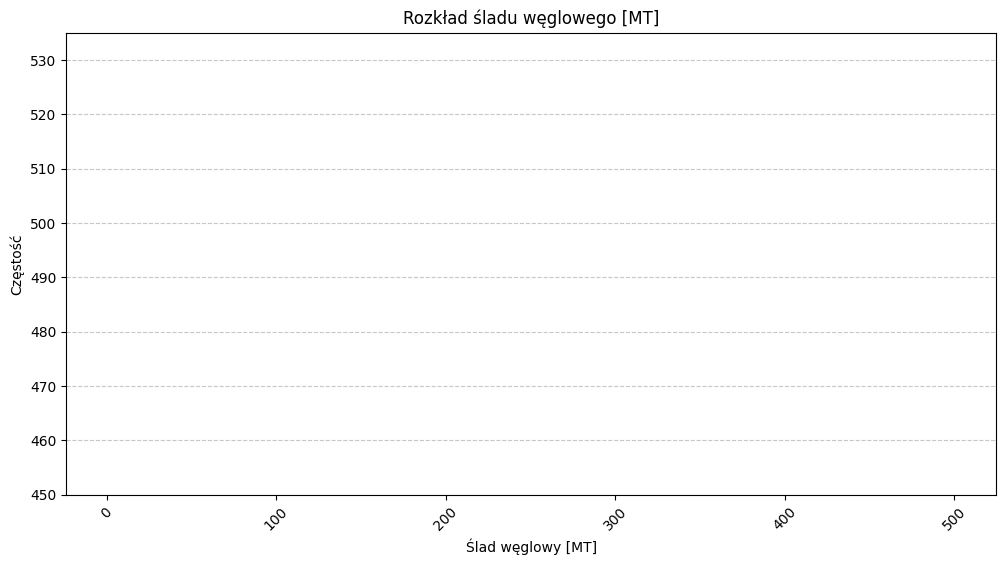

In [16]:
plt.figure(figsize=(12, 6))
df['Carbon_Footprint_MT'].plot(kind='hist', edgecolor='white')
plt.title('Rozkład śladu węglowego [MT]')
plt.xlabel('Ślad węglowy [MT]')
plt.ylabel('Częstość')
plt.ylim(450,535)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Najczęstszy ślad węglowy analizowanych marek to 300 - 350 MT, natomiast najrzadziej spotykany jest najmniejszy ślad węglowy - poniżej 50 MT.

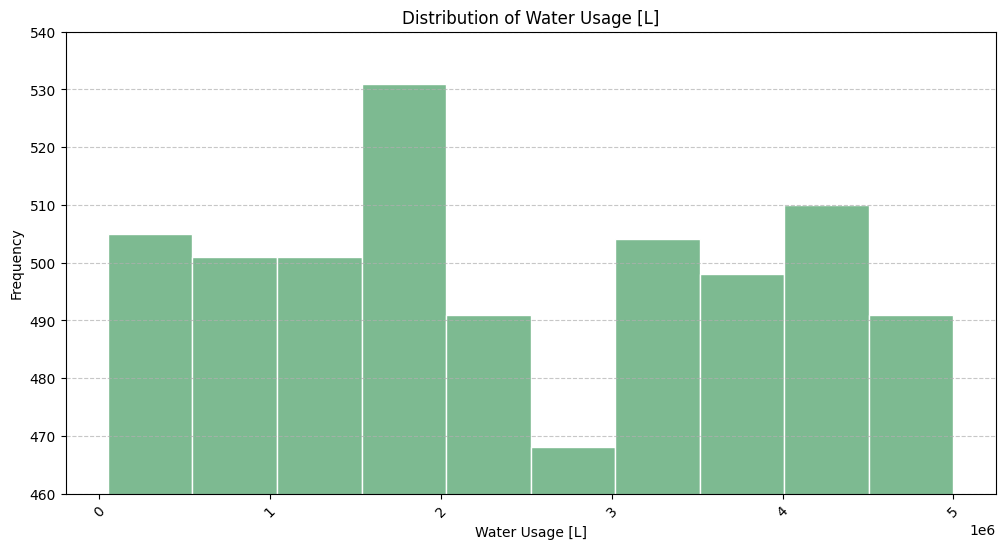

In [165]:
plt.figure(figsize=(12, 6))
df['Water_Usage_Liters'].plot(kind='hist', edgecolor='white')
plt.title('Rozkład użycia wody [L]')
plt.xlabel('Użycie wody [L]')
plt.ylabel('Częstość')
plt.ylim(460,540)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Najczęstsze zużycie wody to 1.5 - 2 litrów. Najrzadziej zużywana ilość wody to 2.5 - 3 litrów. Większość marek zużywa poniżej 2.5 litra wody w trakcie produkcji.

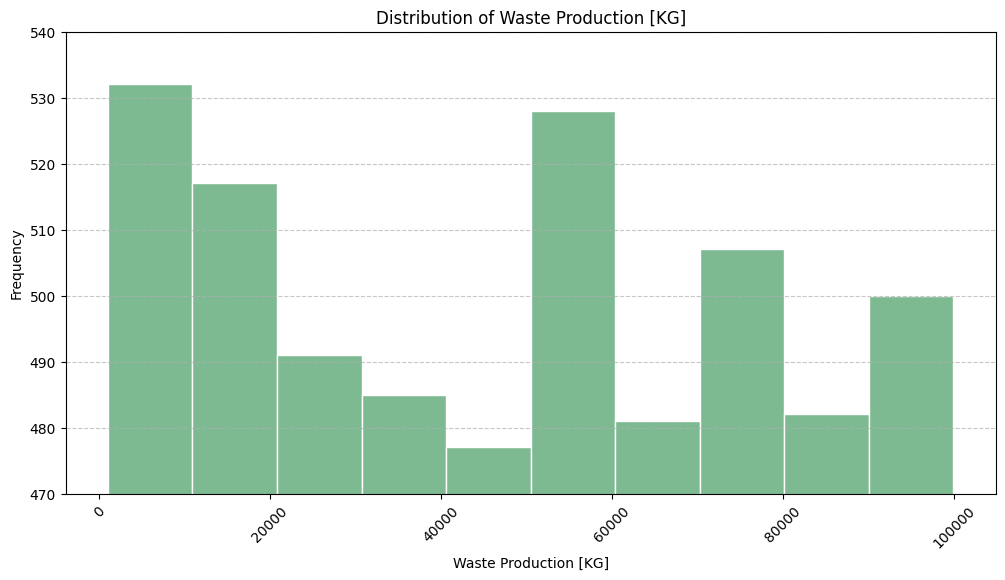

In [169]:
plt.figure(figsize=(12, 6))
df['Waste_Production_KG'].plot(kind='hist', edgecolor='white')
plt.title('Rozkład produkcji odpadów [KG]')
plt.xlabel('Produkcja odpadów [KG]')
plt.ylabel('Częstość')
plt.ylim(470,540)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Największa częstotliwość znajduję się w przedziale 0 - 20000 kg co oznacza, że większość analizowanych jednostek generuje dość małe ilości odpadów.

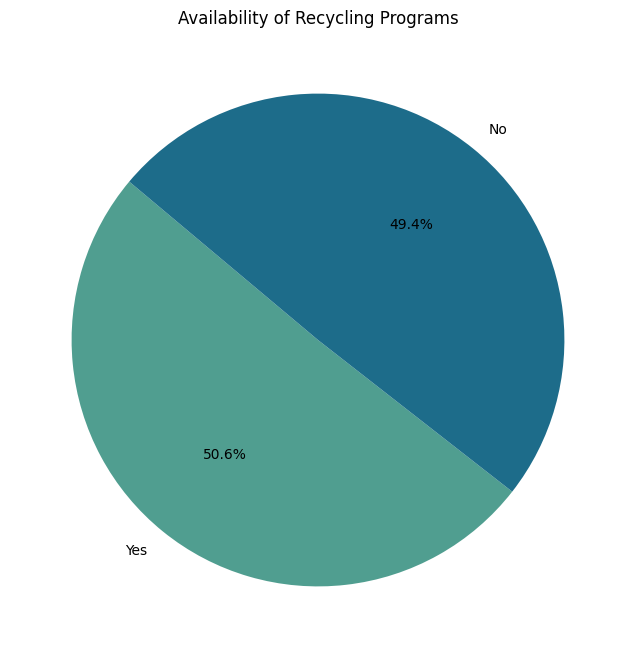

In [51]:
manufacturing = df['Recycling_Programs'].value_counts()
colors = sns.color_palette(PALETTE, 2)
plt.figure(figsize=(8, 8))
plt.pie(manufacturing, labels=manufacturing.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Dostępność programów recyklingu')
plt.show()

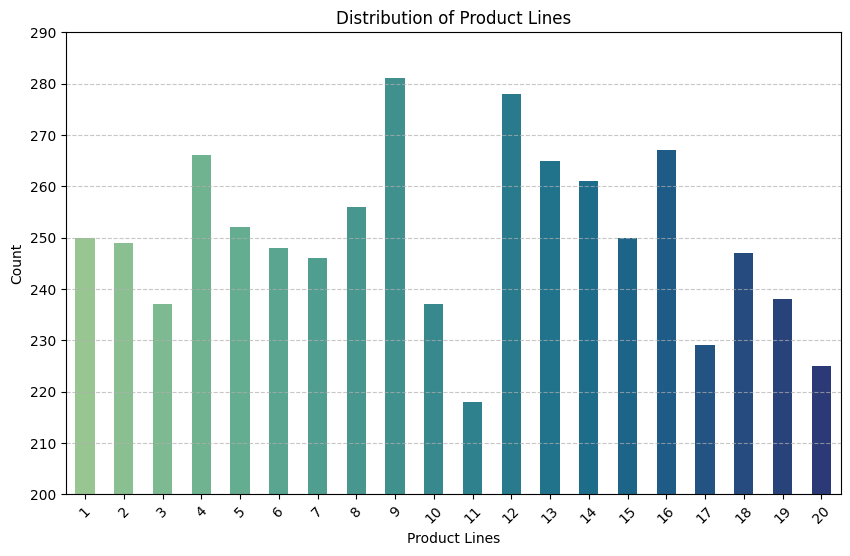

In [173]:
plt.figure(figsize=(10, 6))
df['Product_Lines'].value_counts().sort_index().plot(kind='bar', color=sns.color_palette(PALETTE, n_colors=20))
plt.title('Rozkład linii produktów')
plt.xlabel('Linie produktów')
plt.ylabel('Ilość')
plt.ylim(200,290)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Linia produktów 9 jest najczęsciej reprezentowana, natomiast linia 11 najmniej. Może to oznaczać, że linia 9 obejmuje najbardziej popularne produkty, a linia 11 te bardziej niszowe, skierowane do węższej grupy konsumentów.

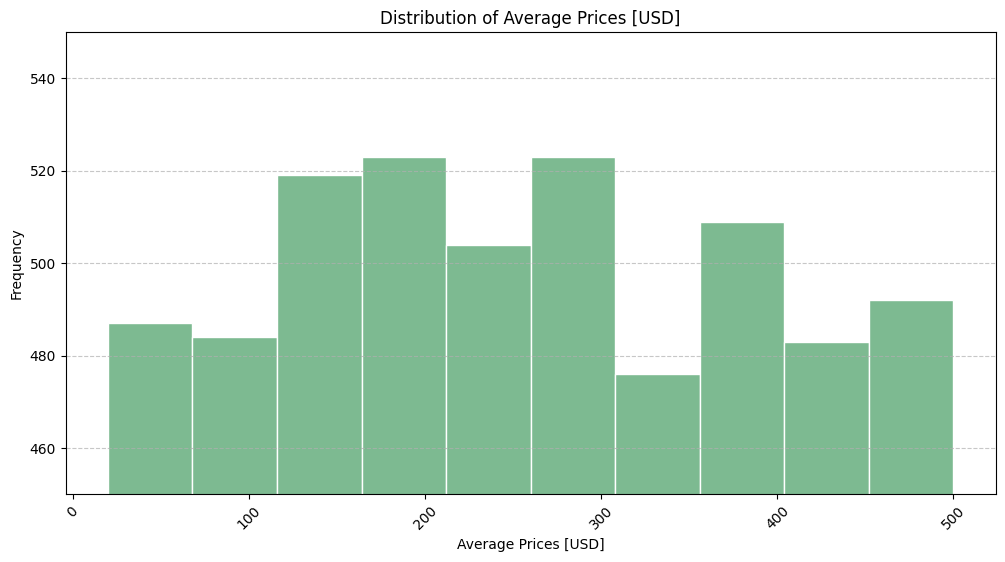

In [55]:
plt.figure(figsize=(12, 6))
df['Average_Price_USD'].plot(kind='hist', edgecolor='white')
plt.title('Rozkład średnich cen [USD]')
plt.xlabel('Średnie ceny [USD]')
plt.ylabel('Częstość')
plt.ylim(450,550)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Dane są rozłożone równomiernie w szerokim zakresie od 0 do 500 USD. Nie występuje widoczna koncentracja wokół jednego przedziału, co sugeruje dużą różnorodność cen w danych.

In [18]:
market = df['Market_Trend'].value_counts()
colors = sns.color_palette(PALETTE, 3)
plt.figure(figsize=(8, 8))
plt.pie(market, labels=market.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Proporcja trendów sprzedażowych')
plt.show()

NameError: name 'PALETTE' is not defined

Z danych wynika, że największa ilość trendów sprzedażowych jest stabilna.

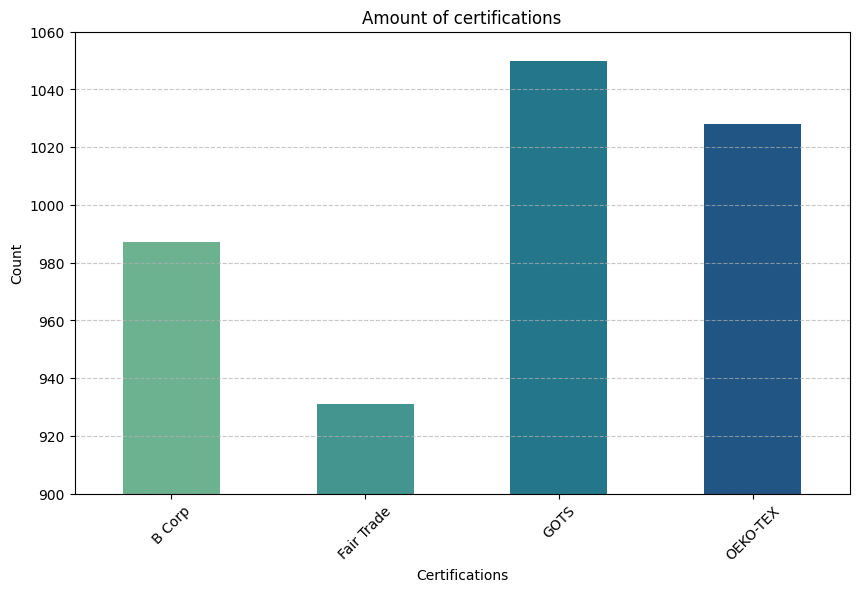

In [177]:
plt.figure(figsize=(10, 6))
df['Certifications'].value_counts().sort_index().plot(kind='bar', color=sns.color_palette(PALETTE, n_colors=4))
plt.title('Liczba certyfikatów')
plt.xlabel('Certyfikaty')
plt.ylabel('Ilość')
plt.ylim(900,1060)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Najwięcej marek może pochwalić się certyfikatem takim jak GOTS, a najrzadziej spotykany certyfikat to Fair Trade.

## Wizualizacja zależności między wartościami

C:\Users\ola86\AppData\Local\Temp\ipykernel_18820\2439636049.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sustainability_Rating', y='Average_Price_USD', palette=PALETTE)


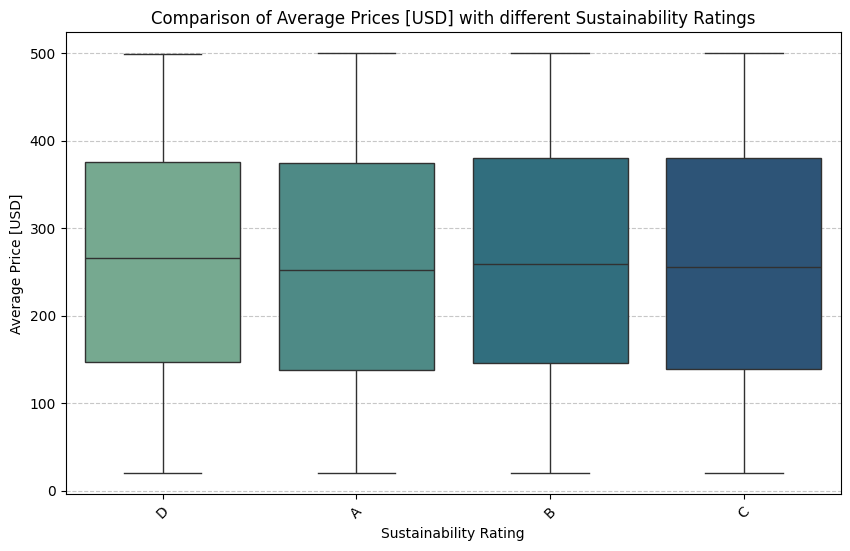

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sustainability_Rating', y='Average_Price_USD', palette=PALETTE)
plt.title('Porównanie średnich cen [USD] z różnymi ocenami zrównoważonego rozwoju')
plt.xlabel('Ocena zrównoważonego rozwoju')
plt.xticks(rotation=45)
plt.ylabel('Średnia cena [USD]')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Na wykresie możemy zaobserwować, że średnie ceny produktów są bardzo podobne we wszystkich grupach ocen zrównoważonego rozwoju (D, A, B, C), a mediany cen oscylują w przedziale 250-300 USD. Zakresy cen oraz rozkład danych są zbliżone, co sugeruje, że poziom zrównoważenia nie ma istotnego wpływu na kształtowanie cen produktów.

C:\Users\ola86\AppData\Local\Temp\ipykernel_18820\106695388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Material_Type', y='Carbon_Footprint_MT', palette=PALETTE)


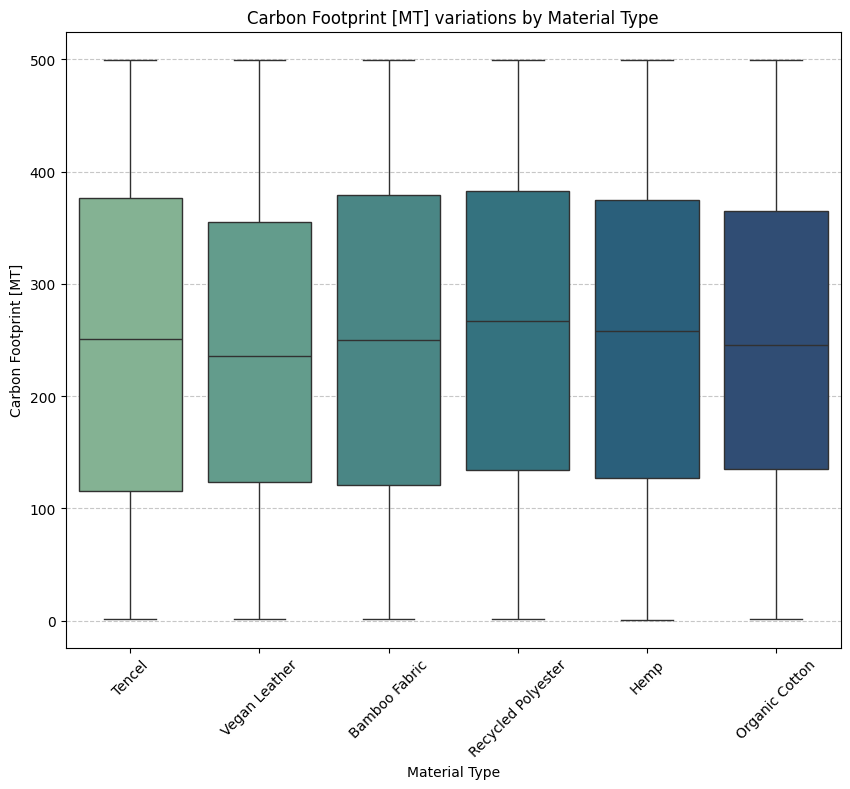

In [64]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Material_Type', y='Carbon_Footprint_MT', palette=PALETTE)
plt.title('Zależność śladu węglowego [MT] od typu materiału')
plt.xlabel('Typ materiału')
plt.xticks(rotation=45)
plt.ylabel('Ślad węglowy [MT]')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

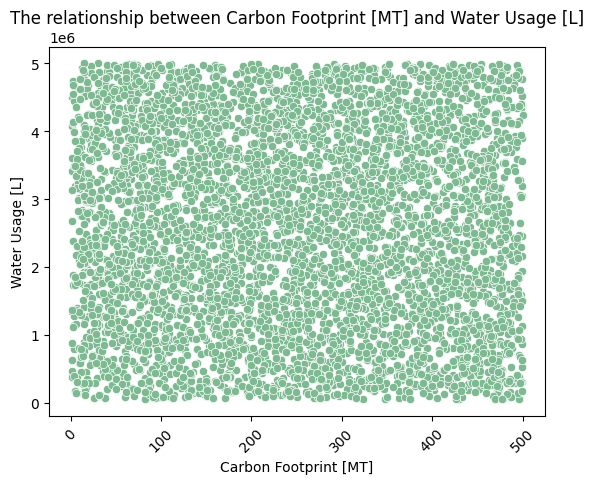

In [66]:
sns.scatterplot(x='Carbon_Footprint_MT', y='Water_Usage_Liters', data=df)
plt.title('Zależność między śladem węglowym [MT] a zużyciem wody [L]')
plt.xlabel('Ślad węglowy [MT]')
plt.ylabel('Zużycie wody [L]')
plt.xticks(rotation = 45)
plt.show()

Punkty na wykresie są rozproszone w sposób losowy co sugeruje nam, że nie ma istotnej korelacji między zużyciem wody, a śladem węglowym.

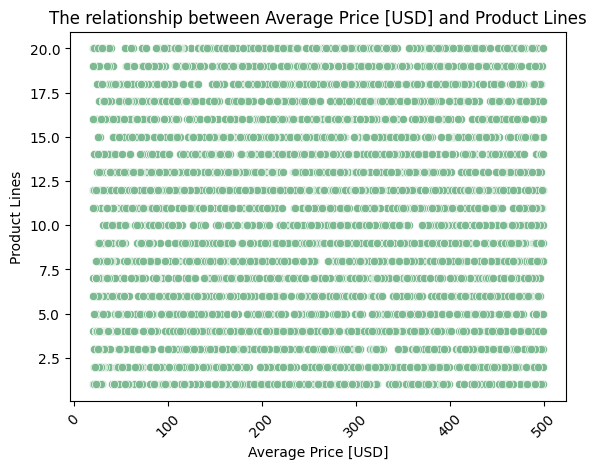

In [68]:
sns.scatterplot(x='Average_Price_USD', y='Product_Lines', data=df)
plt.title('Zależność między średnią ceną [USD] a liniami produktu')
plt.xlabel('Średnia cenna [USD]')
plt.ylabel('Linia produktu')
plt.xticks(rotation = 45)
plt.show()

Punkty są równomiernie rozproszone wzdłuż osi, co sugeruje nam, że linie produktów mają pdobny zakres cen, a cena nie jest ściśle powiązana z konkretną linią.

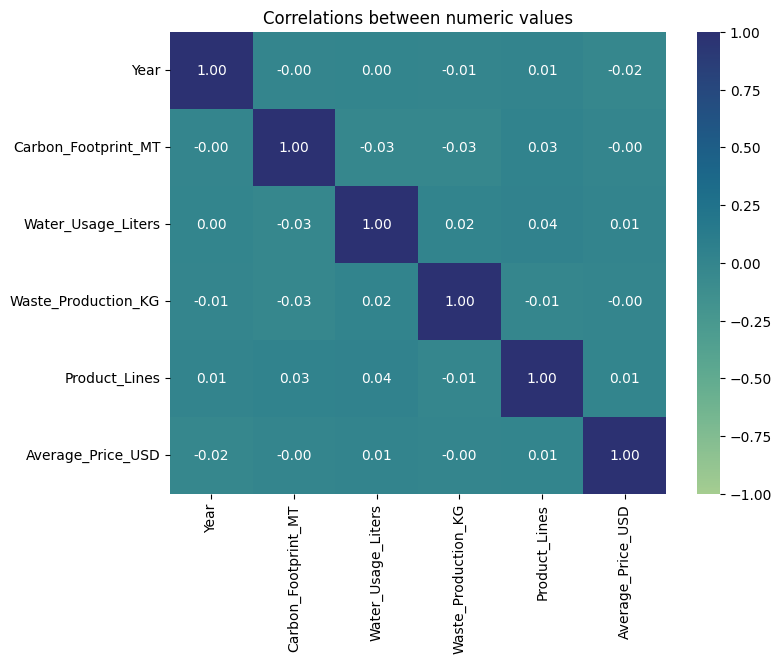

In [70]:
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=PALETTE, vmin=-1, vmax=1, fmt='.2f', cbar=True)
plt.title('Korelacja między wartościami numerycznymi')
plt.show()

Najsilniejszą korelację możemy zaobserwować między linią produktu, a zużyciem wody, jednak nadal jest to bardzo słaba korelacja (równa 0.04), widzimy więc, że nie występuje silna korelacja między żadnymi zmiennymi.

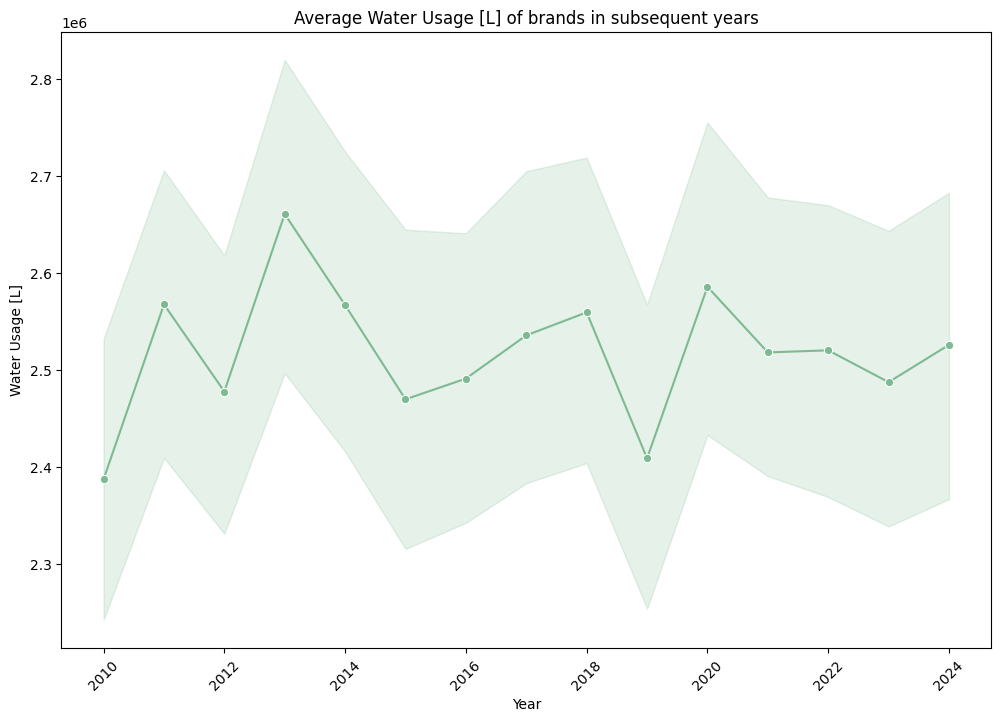

In [72]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Year', y='Water_Usage_Liters', marker='o')
plt.title('Średnie użycie wody [L] na przestrzeni lat')
plt.xlabel('Rok')
plt.ylabel('Użycie wody [L]')
plt.xticks(rotation=45)
plt.show()

Największy wzrost w zużyciu wody w czasie produkcji miał miejsce w 2013 roku, natomiast największy spadek możemy zaobserwować w roku 2019. W latach 2014 - 2018 obserwujemy jedynie wielki wzrost, w latach 2021 - 2022 różnica jest bardzo niewielka, a od tego czasu nie nastąpił żaden gwałtowny spadek, ani wzrost.

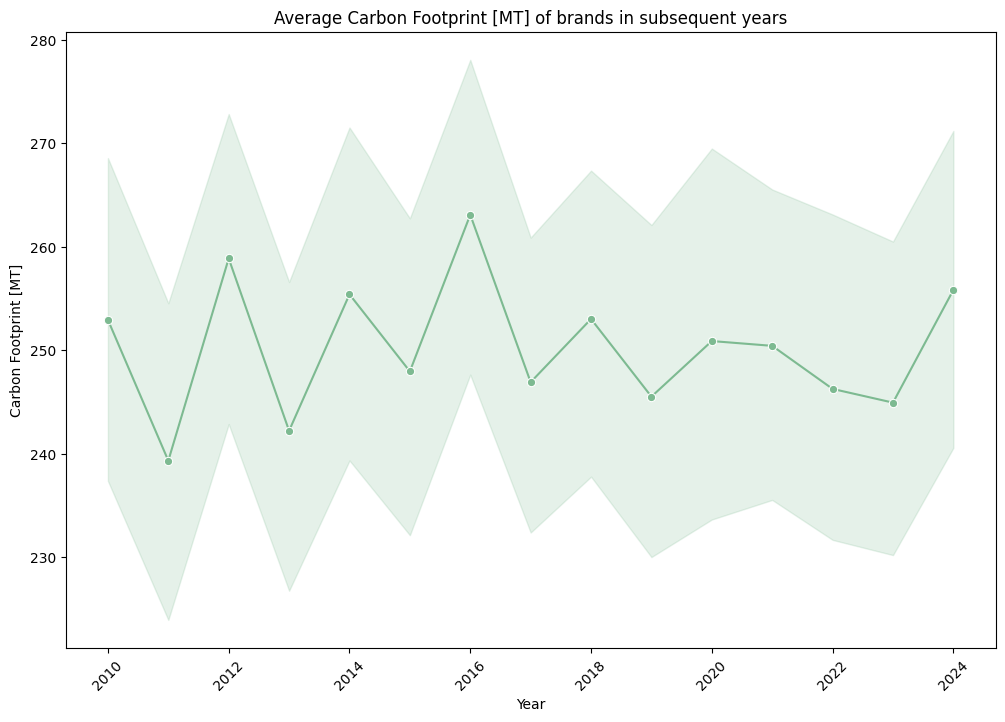

In [74]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Year', y='Carbon_Footprint_MT', marker='o')
plt.title('Średni ślad węglowy [MT] na przestrzeni lat')
plt.xlabel('Rok')
plt.xticks(rotation=45)
plt.ylabel('Ślad węglowy [MT]')
plt.show()

Możemy zaobserwować naprzemienny duży spadek i duży wzrost, aż do roku 2017, od którego spadki oraz wzrosty są zdecydowanie mniejsze, z bardzo niewielką różnicą w latach 2020 - 2021.

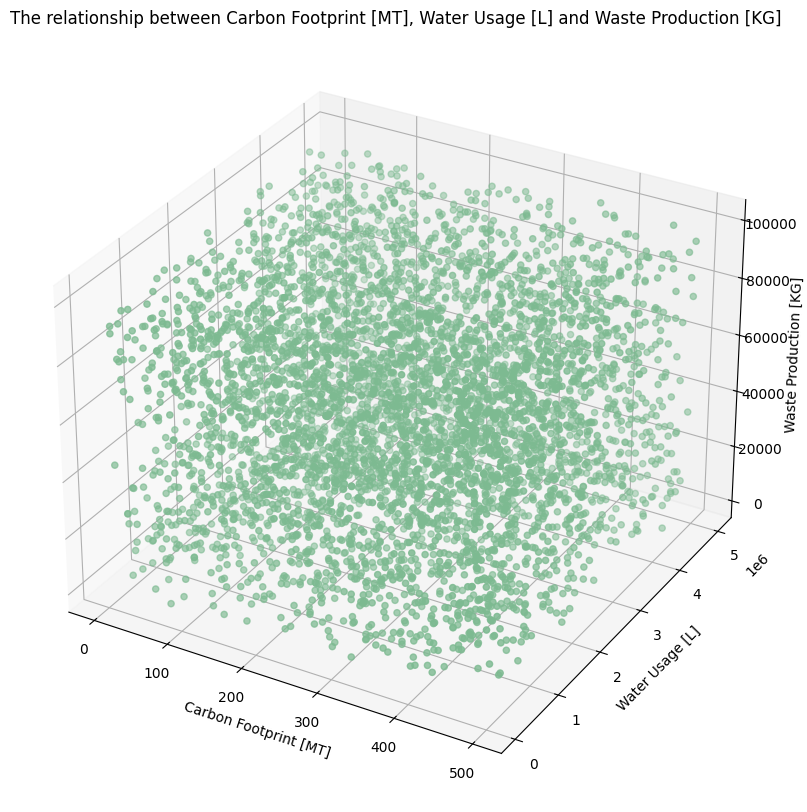

In [76]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Carbon_Footprint_MT'], df['Water_Usage_Liters'], df['Waste_Production_KG'], marker='o')
ax.set_xlabel('Ślad węglowy [MT]')
ax.set_ylabel('Użycie wody [L]')
ax.set_zlabel('Produkcja odpadów [KG]')
ax.set_title('Związek między śladem węglowym [MT], zużyciem wody [L] a produkcją odpadów [KG]')
plt.show()

Wykres pokazuje, że dane dotyczące śladu węglowego, zużycia wody i produkcji odpadów są rozproszone, bez wyraźnego wzorca lub korelacji między tymi trzema zmiennymi.

C:\Users\ola86\AppData\Local\Temp\ipykernel_18820\678166041.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Material_Type', y='Average_Price_USD', data=df, palette=PALETTE)


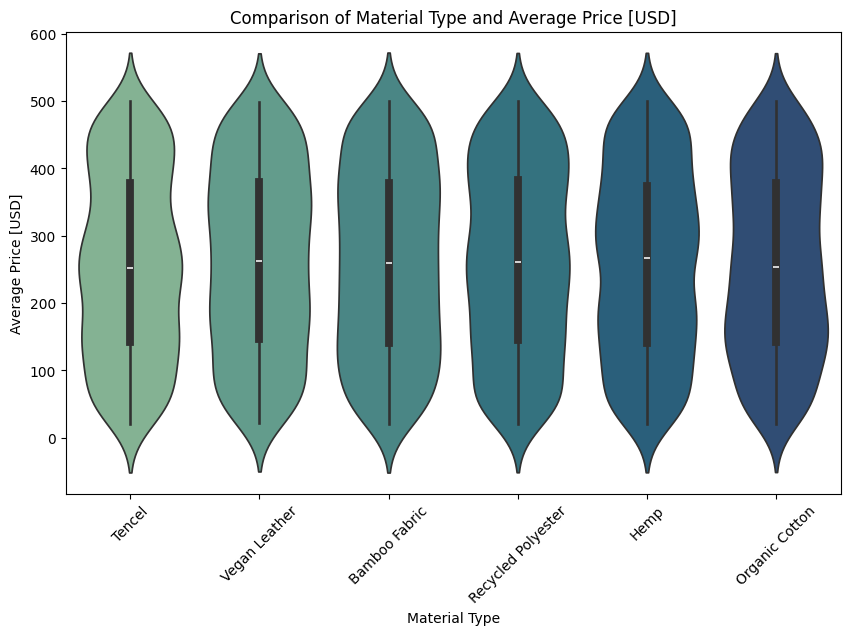

In [78]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Material_Type', y='Average_Price_USD', data=df, palette=PALETTE)
plt.title('Porównanie typów materiałów i średnich cen [USD]')
plt.xlabel('Typ materiału')
plt.xticks(rotation=45)
plt.ylabel('Średnia cena [USD]')
plt.show()

Wykres pokazuje, że ceny produktów z różnych materiałów są zbliżone, a ich rozkłady różnią się nieznacznie. Większość materiałów jak tencel, materiał bambusowy czy poliester z recyklingu, ma podobny średni poziom cen (200–300 USD), natomiast materiały konopne i bawełna organiczna wykazują trochę większe zróżnicowanie cen.